In [1]:
import pandas as pd


In [2]:
data = pd.read_csv("Dataset-SA.csv")
data.head(10)

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive
6,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,highly recommended,very good product,positive
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,nice,very nice,positive
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,unsatisfactory,very bad cooler,negative
9,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,4,worth the money,very good,positive


In [3]:
data.shape

(205052, 6)

In [4]:
data.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [5]:
data['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [6]:
data = data[['Sentiment', 'Review', 'Summary']].copy()

In [7]:
data.head()

,Sentiment,Review,Summary
0,positive,super!,great cooler excellent air flow and for this p...
1,positive,awesome,best budget 2 fit cooler nice cooling
2,positive,fair,the quality is good but the power of air is de...
3,negative,useless product,very bad product its a only a fan
4,neutral,fair,ok ok product


<AxesSubplot: >

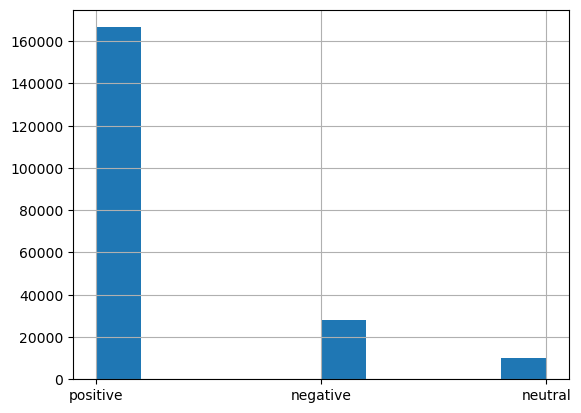

In [8]:
data['Sentiment'].hist()

In [9]:
target_map = {'positive':1, 'negative':0, 'neutral':2}
data['target'] = data['Sentiment'].map(target_map)

In [10]:
data.head(10)

,Sentiment,Review,Summary,target
0,positive,super!,great cooler excellent air flow and for this p...,1
1,positive,awesome,best budget 2 fit cooler nice cooling,1
2,positive,fair,the quality is good but the power of air is de...,1
3,negative,useless product,very bad product its a only a fan,0
4,neutral,fair,ok ok product,2
5,positive,awesome,the cooler is really fantastic and provides go...,1
6,positive,highly recommended,very good product,1
7,positive,nice,very nice,1
8,negative,unsatisfactory,very bad cooler,0
9,positive,worth the money,very good,1


In [15]:
data['Review'] = data['Review'].fillna('')

In [16]:
train_size = int(0.8 * len(data))
train_text = data['Review'][:train_size]
train_labels = data['Sentiment'][:train_size]
test_text = data['Review'][train_size:]
test_labels = data['Sentiment'][train_size:]

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_text)
X_test = vectorizer.transform(test_text)

In [22]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=train_labels.unique(), y=train_labels)
class_weights_dict = dict(enumerate(class_weights))

In [24]:
class_weights_dict = {'positive': 0.5, 'neutral': 0.2, 'negative': 0.3}


In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight=class_weights_dict)
clf.fit(X_train, train_labels)


C:\Users\ARKYA BANERJEE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={'negative': 0.3, 'neutral': 0.2,
                                 'positive': 0.5})

In [26]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, train_labels)

In [27]:
clf2 = LogisticRegression()
clf2.fit(X_resampled, y_resampled)

C:\Users\ARKYA BANERJEE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [30]:
print('Accuracy with class weighting:', accuracy_score(test_labels, y_pred))
print('Accuracy with resampling:', accuracy_score(test_labels, y_pred2))
print('ROC AUC score:', roc_auc_score(test_labels, clf.predict_proba(X_test), multi_class='ovr'))
print('Confusion matrix:\n', confusion_matrix(test_labels, y_pred))

Accuracy with class weighting: 0.9054156201994586
Accuracy with resampling: 0.7789861256735998
ROC AUC score: 0.8748606249522818
Confusion matrix:
 [[ 3392     0  1670]
 [  486     0  1290]
 [  433     0 33740]]
